***Step-1 Import Libraries***

In [62]:
# Import Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Step-2 Loading Dataset***

In [63]:
# Load the Dataset:
import pandas as pd
data=pd.read_excel("/content/nordic_ecommerce_data.xlsx")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,221958,SKU3652,Laptop Bag,-5,2023-01-11,79.20,12933,Finland
1,771155,SKU5318,Backpack,8,2023-12-12,15.71,12063,Denmark
2,231932,SKU6385,Phone Charger,6,2023-07-24,475.32,14318,Norway
3,465838,SKU8054,T-shirt,8,2023-07-04,390.07,12720,Norway
4,359178,SKU1827,Backpack,1,2023-10-09,112.11,16349,Finland
...,...,...,...,...,...,...,...,...
19995,368617,SKU9016,Wireless Mouse,8,2023-07-16,251.75,11971,Denmark
19996,796658,SKU1226,Backpack,-5,2023-05-09,115.42,16019,Norway
19997,511885,SKU7142,Wireless Mouse,6,2023-06-14,189.53,16835,Finland
19998,985932,SKU8482,Coffee Mug,9,2023-12-02,59.14,12231,Finland


In [64]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,221958,SKU3652,Laptop Bag,-5,2023-01-11,79.20,12933,Finland
1,771155,SKU5318,Backpack,8,2023-12-12,15.71,12063,Denmark
2,231932,SKU6385,Phone Charger,6,2023-07-24,475.32,14318,Norway
3,465838,SKU8054,T-shirt,8,2023-07-04,390.07,12720,Norway
4,359178,SKU1827,Backpack,1,2023-10-09,112.11,16349,Finland


***Step-3 Data Cleaning***

In [65]:
# Missing Data:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


***Creating New column for Total Price***

In [66]:
data["TotalPrice"]=data["Quantity"]*data["UnitPrice"]
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,221958,SKU3652,Laptop Bag,-5,2023-01-11,79.20,12933,Finland,-396.00
1,771155,SKU5318,Backpack,8,2023-12-12,15.71,12063,Denmark,125.68
2,231932,SKU6385,Phone Charger,6,2023-07-24,475.32,14318,Norway,2851.92
3,465838,SKU8054,T-shirt,8,2023-07-04,390.07,12720,Norway,3120.56
4,359178,SKU1827,Backpack,1,2023-10-09,112.11,16349,Finland,112.11
...,...,...,...,...,...,...,...,...,...
19995,368617,SKU9016,Wireless Mouse,8,2023-07-16,251.75,11971,Denmark,2014.00
19996,796658,SKU1226,Backpack,-5,2023-05-09,115.42,16019,Norway,-577.10
19997,511885,SKU7142,Wireless Mouse,6,2023-06-14,189.53,16835,Finland,1137.18
19998,985932,SKU8482,Coffee Mug,9,2023-12-02,59.14,12231,Finland,532.26


***Remove Cancelled orders***

In [67]:
data=data[data["Quantity"]>0]
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
1,771155,SKU5318,Backpack,8,2023-12-12,15.71,12063,Denmark,125.68
2,231932,SKU6385,Phone Charger,6,2023-07-24,475.32,14318,Norway,2851.92
3,465838,SKU8054,T-shirt,8,2023-07-04,390.07,12720,Norway,3120.56
4,359178,SKU1827,Backpack,1,2023-10-09,112.11,16349,Finland,112.11
6,210268,SKU4385,Laptop Bag,4,2023-12-26,479.94,16833,Norway,1919.76
...,...,...,...,...,...,...,...,...,...
19994,912344,SKU1531,Bluetooth Speaker,3,2023-03-18,278.38,15344,Finland,835.14
19995,368617,SKU9016,Wireless Mouse,8,2023-07-16,251.75,11971,Denmark,2014.00
19997,511885,SKU7142,Wireless Mouse,6,2023-06-14,189.53,16835,Finland,1137.18
19998,985932,SKU8482,Coffee Mug,9,2023-12-02,59.14,12231,Finland,532.26


***Step-4 Exploratory Data Analysis***

In [68]:
# Revenue By Country:
Country_Revenue=data.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False)
Country_Revenue

,TotalPrice
Country,
Sweden,4182215.44
Denmark,3998272.83
Norway,3964666.40
Finland,3919328.33


In [69]:
# Top-10 products:
Top_10_products=data.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
Top_10_products

,Quantity
Description,
Desk Lamp,6719
Phone Charger,6623
Backpack,6552
Bluetooth Speaker,6529
Running Shoes,6513
Coffee Mug,6311
Wireless Mouse,6251
Notebook,6232
T-shirt,6195


In [70]:
# Monthly Revenue Trend:
data["InvoiceDate"]=pd.to_datetime(data["InvoiceDate"])
data["Month"]=data["InvoiceDate"].dt.to_period("M")
Monthly_Revenue=data.groupby("Month")["TotalPrice"].sum()
Monthly_Revenue

<ipython-input-70-97e5dd665d09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["InvoiceDate"]=pd.to_datetime(data["InvoiceDate"])
<ipython-input-70-97e5dd665d09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Month"]=data["InvoiceDate"].dt.to_period("M")


,TotalPrice
Month,
2023-01,1355195.53
2023-02,1189170.32
2023-03,1460037.34
2023-04,1243761.61
2023-05,1322204.04
2023-06,1314855.93
2023-07,1478626.83
2023-08,1402930.48
2023-09,1264389.41


In [71]:
# Average Spend per customer:
avg_spend_customer=data.groupby("CustomerID")["TotalPrice"].mean()
avg_spend_customer

,TotalPrice
CustomerID,
10000,2247.870
10001,2352.700
10004,27.420
10005,361.685
10006,129.220
...,...
19991,1749.520
19992,97.320
19993,2043.920


In [72]:
# Best Customer:
Best_Customer=data.groupby("CustomerID")["TotalPrice"].sum().sort_values(ascending=False).head(1)
Best_Customer

,TotalPrice
CustomerID,
19355,15134.99


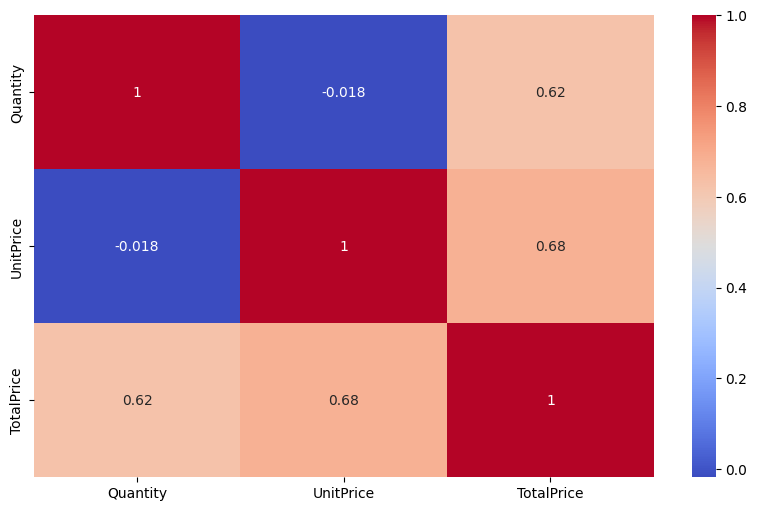

In [73]:
# Correlation Heatmap:
corr_matrix=data[["Quantity","UnitPrice","TotalPrice"]].corr()
corr_figure=plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.show()

***Visualization***

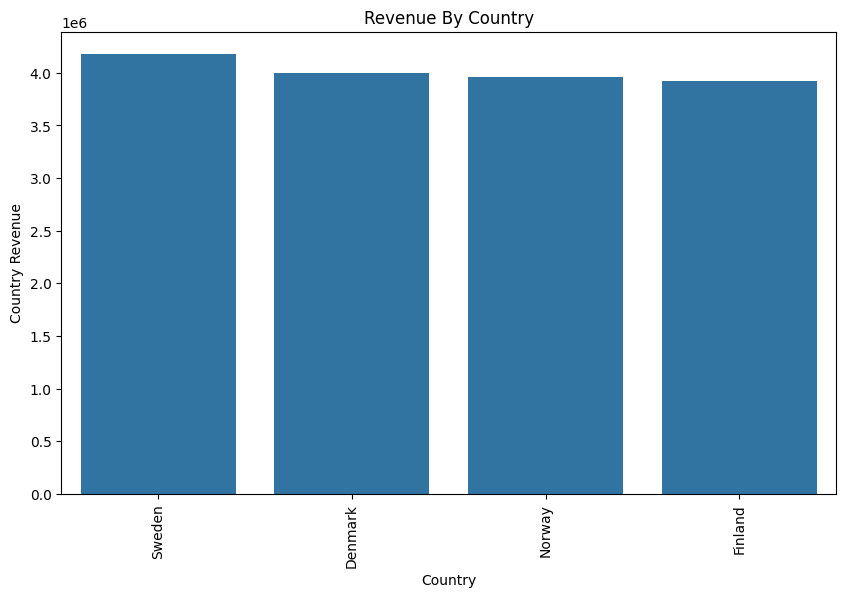

<Figure size 640x480 with 0 Axes>

In [84]:
# Using matplotlib and Seaborn to plot:
# Bar Charts
plt.figure(figsize=(10,6))
sns.barplot(x=Country_Revenue.index,y=Country_Revenue.values)
plt.xlabel("Country")
plt.ylabel("Country Revenue")
plt.title("Revenue By Country")
plt.xticks(rotation=90)
plt.show()
plt.savefig("revenue_by_country.png")

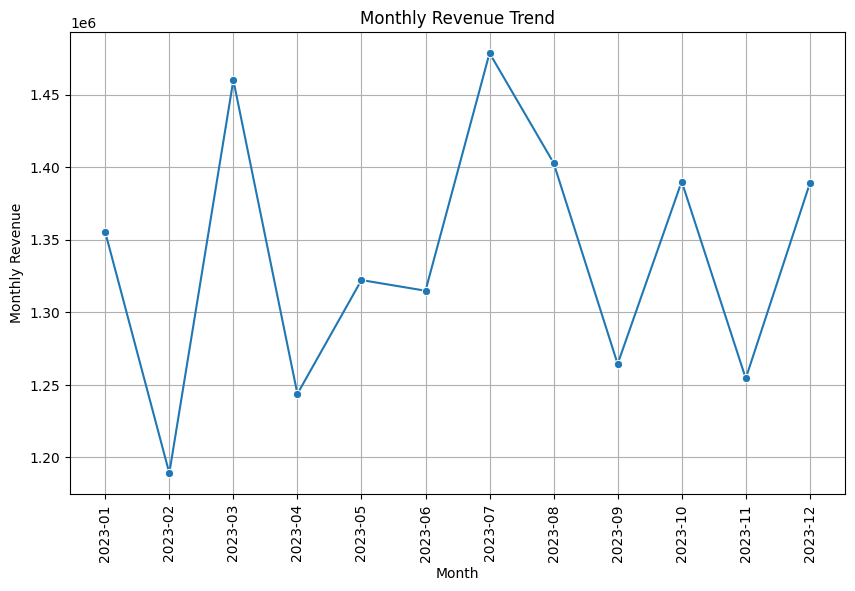

<Figure size 640x480 with 0 Axes>

In [83]:
# Line Charts with markers
plt.figure(figsize=(10,6))
sns.lineplot(x=Monthly_Revenue.index.astype(str),y=Monthly_Revenue.values,marker="o")
plt.xlabel("Month")
plt.ylabel("Monthly Revenue")
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
plt.savefig("monthly_revenue_trend.png")

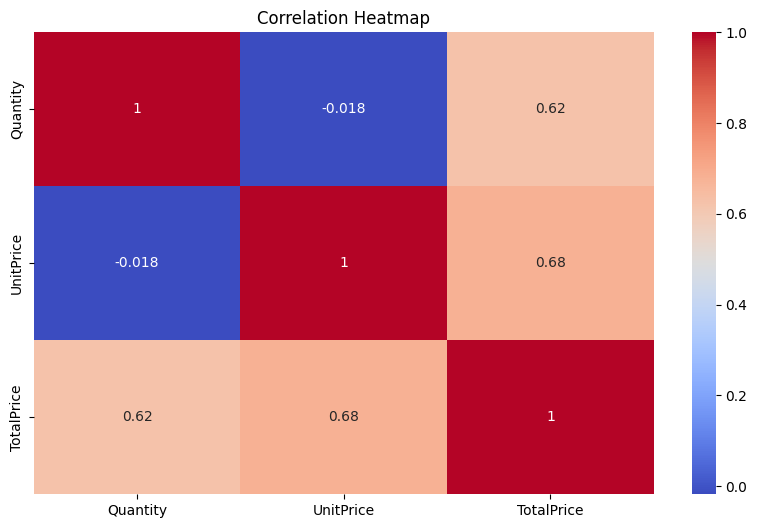

<Figure size 640x480 with 0 Axes>

In [82]:
# Heatmaps:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
plt.savefig("correlation_heatmap.png")

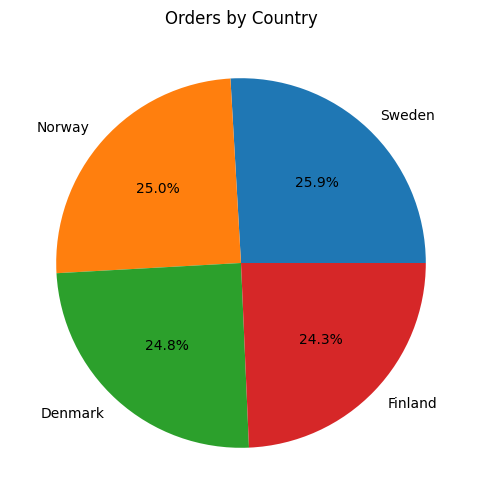

<Figure size 640x480 with 0 Axes>

In [81]:
# Pie Chart orders by country:
orders_by_country=data['Country'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(orders_by_country,labels=orders_by_country.index,autopct="%1.1f%%")
plt.title("Orders by Country")
plt.show()
plt.savefig("orders_by_country.png")